# Automatic Gaussian Mixture Model (AutoGMM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(0)

Clustering is a foundational data analysis task, where members of the data set are sorted into groups or "clusters" according to measured similarities between the objects. According to some quantitative criteria, members of the same cluster are similar and members of distinct clusters are different.

The Automatic Gaussian Mixture Model or AutoGMM is a clustering algorithm that uses Sklearn's hierarchical agglomerative clustering and then Gaussian mixtured model (GMM) fitting. Different combinations of agglomeration, GMM,and cluster numbers are used in the algorithm, and the clustering with the best selection criterion (bic/aic) is chosen.

Clustering is a foundational data analysis task, where members of the data set are sorted into groups or "clusters" according to measured similarities between the objects. According to some quantitative criteria, members of the same cluster are similar and members of distinct clusters are different. 

This algorithm is a Gaussian mixture model (GMM), a statistical model of clustered data that, simply put, is a composition of multiple normal distributions. Each cluster has a weight $w_k$ assigned to it, and the combined probability distribution, $f(x)$, is of the form:

$f(x) = \sum\limits_{k = 1}^K {w_{k}f_{k}(x)} = \sum\limits_{k = 1}^K {\frac{w_{k}}{(2\pi)^{\frac{d}{2}}|\sum_{k}|^{-\frac{1}{2}}}e^{[\frac{1}{2}(x - \mu_{k})^{T}\sum_{k}^{-1}(x - \mu_{k})]}}$

where $k$ is the total number of clusters and $d$ is the dimensionality of the data.

Expectation Maximization (EM) algorithms are then run to estimate model parameters and the fitted GMM is used to cluster the data.

Let's look at an example using the synthetic data from this [paper](https://arxiv.org/abs/1909.02688)

In [2]:
from graspy.cluster.autogmm import AutoGMMCluster

# Synthetic data
ks = [i for i in range(1,21)]

x_synthetic = np.genfromtxt('../../../../autogmm/data/synthetic.csv', delimiter=',',skip_header=0)
x_synthetic = x_synthetic[:,np.arange(1,x_synthetic.shape[1])]
c_true_synthetic = np.genfromtxt('../../../../autogmm/data/synthetic.csv', delimiter=',', usecols = (0),skip_header=0)

# Fit model
model_synthetic = AutoGMMCluster(min_components=ks[0],max_components=ks[len(ks)-1],
    affinity='all',linkage='all',covariance_type='all',
    random_state=0)

c_hat_autogmm_synthetic = model_synthetic.fit_predict(x_synthetic,c_true_synthetic)

In [3]:
# We can review each model tested and observe the best one generated
combo = [model_synthetic.affinity_,model_synthetic.linkage_,model_synthetic.covariance_type_]
k = model_synthetic.n_components_
reg = model_synthetic.reg_covar_
bic = -model_synthetic.criter_

print('Best model: ' + str(combo))
print('Best reg: ' + str(reg))
print('Best k: ' + str(k))
print('Best BIC: ' + str(bic))

model_synthetic.results_

Best model: [&#39;euclidean&#39;, &#39;ward&#39;, &#39;spherical&#39;]
Best reg: 0.0
Best k: 3
Best BIC: -1120.483921563501


,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n...",1330.759121,0.000000,1,euclidean,ward,spherical,0.000000
1,"GaussianMixture(covariance_type='spherical',\n...",1229.575046,0.603087,2,euclidean,ward,spherical,0.000000
2,"GaussianMixture(covariance_type='spherical',\n...",1120.483922,1.000000,3,euclidean,ward,spherical,0.000000
3,"GaussianMixture(covariance_type='spherical',\n...",1142.478626,0.808816,4,euclidean,ward,spherical,0.000000
4,"GaussianMixture(covariance_type='spherical',\n...",1156.032480,0.707115,5,euclidean,ward,spherical,0.000000
...,...,...,...,...,...,...,...,...
875,"GaussianMixture(n_components=16, random_state=0)",1342.811799,0.272436,16,none,ward,full,0.000001
876,"GaussianMixture(n_components=17, random_state=0)",1365.514390,0.254864,17,none,ward,full,0.000001
877,"GaussianMixture(n_components=18, random_state=0)",1370.061491,0.239264,18,none,ward,full,0.000001
878,"GaussianMixture(n_components=19, random_state=0)",1353.817180,0.237126,19,none,ward,full,0.000001


Now let's look at the Drosophila mushroom dataset

In [6]:
from graspy.cluster.autogmm import AutoGMMCluster

# Drosophila Data
ks = [i for i in range(1,21)]

x_drosophila = np.genfromtxt('../../../../autogmm/data/embedded_right.csv',delimiter=',',skip_header=1)
c_true_drosophila = np.genfromtxt('../../../../autogmm/data/classes.csv',skip_header=1)

# Fit model
model_drosophila = AutoGMMCluster(min_components=ks[0],max_components=ks[len(ks)-1],
    affinity='all',linkage='all',covariance_type='a
    random_state=0)
c_hat_autogmm_drosophila = model_drosophila.fit_predict(x_drosophila,c_true_drosophila)

We can compare our method to the existing implementation of GMM in Sklearn. Our method expands upon the existing Sklearn framework by allowing the user to automatically find the optimal parameters for a Gaussian mixture model and achieve the best clustering possible. In particular, the ideal number of components `n_components` is output by AutoGMM. If we create a GMM model with our parameters using Sklearn, we will see an optimal fit.

In [76]:
from sklearn import mixture

# Ideal parameters from AutoGMM
n_components_synthetic = model_synthetic.n_components_
n_components_drosophila = model_drosophila.n_components_

covariance_type_synthetic = model_synthetic.covariance_type_
covariance_type_drosophila = model_drosophila.covariance_type_

# Have to provide exact number of optimum components apriori
g_synthetic = mixture.GaussianMixture(n_components=n_components_synthetic, covariance_type=covariance_type_synthetic, random_state=0)
g_drosophila = mixture.GaussianMixture(n_components=n_components_drosophila, covariance_type=covariance_type_drosophila, random_state=0)

# Default Sklearn GMM
g_synthetic_default = mixture.GaussianMixture(3)
g_drosophila_default = mixture.GaussianMixture(6)

# Synthetic
c_hat_gmm_synthetic = g_synthetic.fit_predict(x_synthetic)
c_hat_default_synthetic = g_synthetic_default.fit_predict(x_synthetic)

# Drosophila
c_hat_gmm_drosophila = g_drosophila.fit_predict(x_drosophila)
c_hat_default_drosophila = g_drosophila_default.fit_predict(x_drosophila)


Let's compare the synthetic data models first

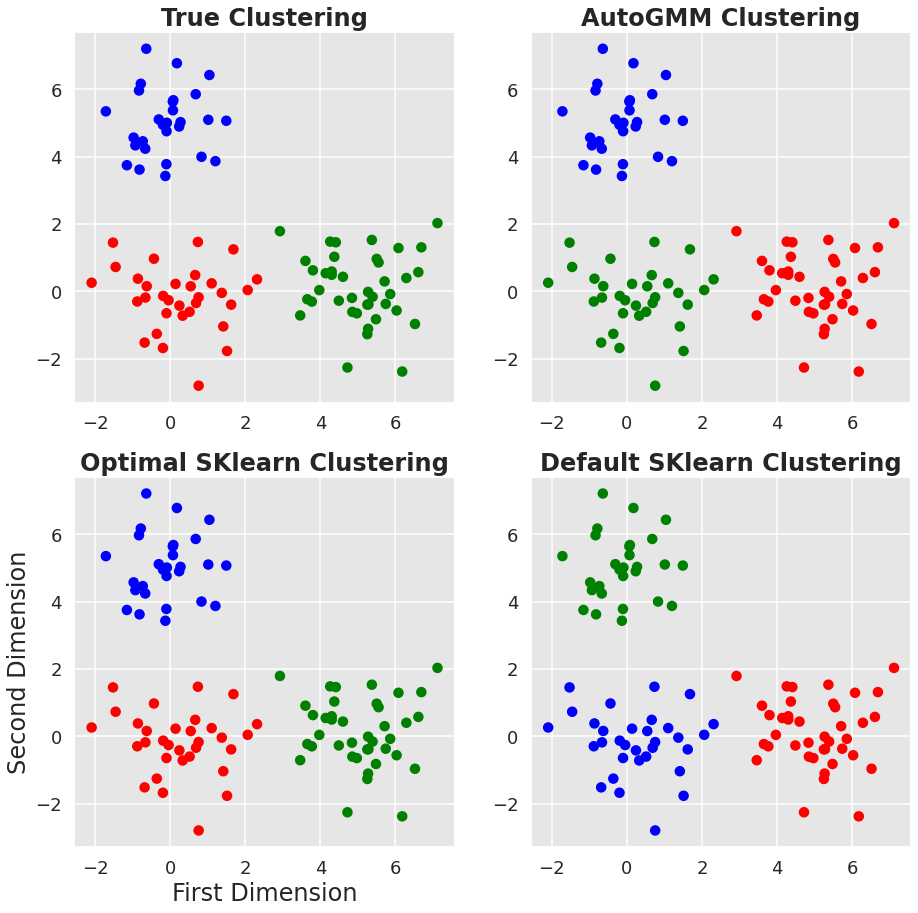

In [77]:
# Plotting Synthetic clusters
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale=1.10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Labels
c_list = ['red', 'green', 'blue','orange','purple','yellow','gray']

# Figure
fig = plt.figure(figsize=(15,15))

# Synthetic AutoGMM Model
plt.subplot(2, 2, (2,2))
plt.title('AutoGMM Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_autogmm_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_hat_autogmm_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Synthetic Optimal SKlearn Model
plt.subplot(2, 2, (3,3))
plt.title('Optimal SKlearn Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_gmm_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_hat_gmm_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xlabel('First Dimension',fontsize=24)
plt.ylabel('Second Dimension',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Synthetic Default SKlearn Model
plt.subplot(2, 2, (4,4))
plt.title('Default SKlearn Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_default_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_hat_default_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Synthetic True Clustering
plt.subplot(2, 2, (1,1))
plt.title('True Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_true_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_true_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

We can see the perfect fit achieve by the optimized GMM in the lower left plot.

Now let's do the same with the Drosophila data models

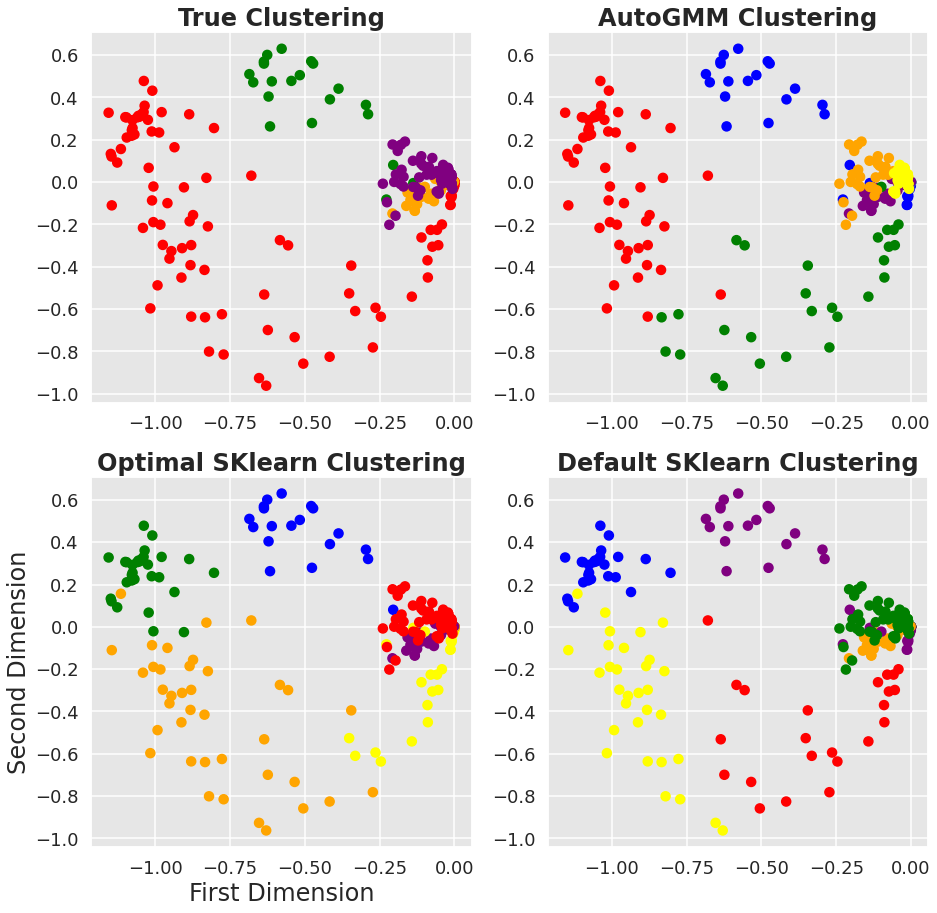

In [80]:
# Drosophila AutoGMM Model

# Figure
fig = plt.figure(figsize=(15,15))

# Drosophila AutoGMM Model
plt.subplot(2, 2, (2,2))
plt.title('AutoGMM Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_autogmm_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_hat_autogmm_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Drosophila SKlearn Model
plt.subplot(2, 2, (3,3))
plt.title('Optimal SKlearn Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_gmm_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_hat_gmm_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xlabel('First Dimension',fontsize=24)
plt.ylabel('Second Dimension',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Drosophila Default SKlearn Model
plt.subplot(2, 2, (4,4))
plt.title('Default SKlearn Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_default_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_hat_default_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Drosophila True Clustering
plt.subplot(2, 2, (1,1))
plt.title('True Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_true_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_true_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

The optimized GMM is once again the optimal estimate of the clusters.